In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Dataset to be loaded

In [51]:
df = pd.read_csv('bpcl_stock_data_yfinance.csv')

drop na values

In [52]:
df = df.dropna()


standard scalar

In [53]:

# Separate numeric columns (automatically selects only numeric types)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale only the numeric columns
scaled_data = scaler.fit_transform(df[numeric_cols])

# Convert the scaled data back to a DataFrame with the original column names
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# If you want to keep the non-numeric columns (like dates), concatenate them back
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64'])
final_df = pd.concat([non_numeric_cols.reset_index(drop=True), scaled_df], axis=1)

# Preview the final DataFrame
print(final_df.head())

         Date      Open      High       Low     Close  Adj Close    Volume
0  2020-01-01  0.667461  0.622212  0.710066  0.675458  -0.037838 -0.586167
1  2020-01-02  0.659780  0.601390  0.689995  0.635921  -0.065139 -0.479341
2  2020-01-03  0.589686  0.554539  0.556837  0.596866  -0.092107  0.566172
3  2020-01-06  0.504229  0.490652  0.481445  0.458487  -0.187661  0.094458
4  2020-01-07  0.436055  0.440963  0.429553  0.379895  -0.241931  0.617644


In [54]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [55]:
X = df[['Open', 'High', 'Low', 'Volume']]  # Use a list of column names inside brackets
y = df['Close']  # Target (output)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If you want to check the shapes of the splits
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (952, 4) (952,)
Test set: (238, 4) (238,)


In [56]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Optionally, you can also check the model coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error (MSE): 2.660426707692985
R-squared (R2): 0.9989479988901877
Coefficients: [-5.50338215e-01  8.58496198e-01  6.89317710e-01 -4.33113667e-09]
Intercept: 0.004330043174661569


In [58]:
X_test

,Open,High,Low,Volume
390,228.000000,230.199997,226.125000,4635256
247,190.000000,192.250000,189.250000,9806128
260,206.000000,215.000000,205.500000,25200192
155,209.399994,209.399994,201.550003,22849152
984,223.625000,225.750000,222.524994,12644672
...,...,...,...,...
535,179.250000,180.399994,178.100006,5636142
1037,321.500000,326.500000,312.625000,18258188
812,166.000000,168.399994,165.800003,4930618
139,226.000000,231.750000,222.649994,22294340


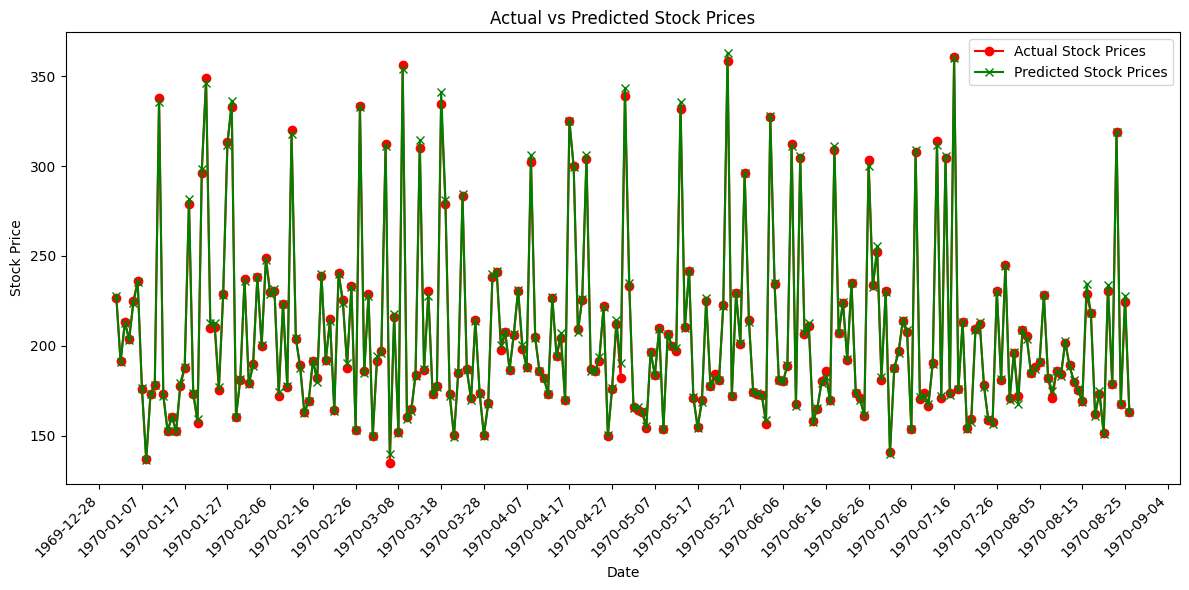

Mean Squared Error (MSE): 2.660426707692985
R-squared (R2): 0.9989479988901877


In [70]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming dates_test is already assigned with date values
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(dates_test, y_test, color='red', marker='o', label='Actual Stock Prices')

# Plot predicted values
plt.plot(dates_test, y_pred, color='green', marker='x', label='Predicted Stock Prices')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')

# Format the x-axis dates to avoid overlap
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Date format
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Show date every 10 days
plt.gcf().autofmt_xdate()  # Rotate and format dates

# Rotate dates for better readability and add legend
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Optionally print model evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


In [62]:
# Ensure the Date column is not part of the features
# Only use the last row of the numerical features (Open, High, Low, Volume) for prediction
next_day_X = X_test[['Open', 'High', 'Low', 'Volume']].iloc[-1].values.reshape(1, -1)  # Reshape for single prediction

# Predict the stock price for the next day
next_day_prediction = model.predict(next_day_X)

# Print the predicted stock price for the next day
print(f"Predicted Stock Price for the next day: {next_day_prediction[0]:.2f}")



Predicted Stock Price for the next day: 163.07


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Stock Prices for the next 30 days:
[228.00493037 190.89686815 212.7569842  203.3656335  224.07611676
 235.67845076 176.34871505 136.37308963 173.16677895 177.98587581
 335.61985048 172.12746784 152.59929503 160.59940635 152.68645093
 179.55669347 188.21942384 281.40935395 173.66092358 159.30104228
 298.61658574 346.40585444 212.84511067 212.67941626 177.19075363
 228.21957588 311.91439963 336.37798278 160.45502247 181.48079492]


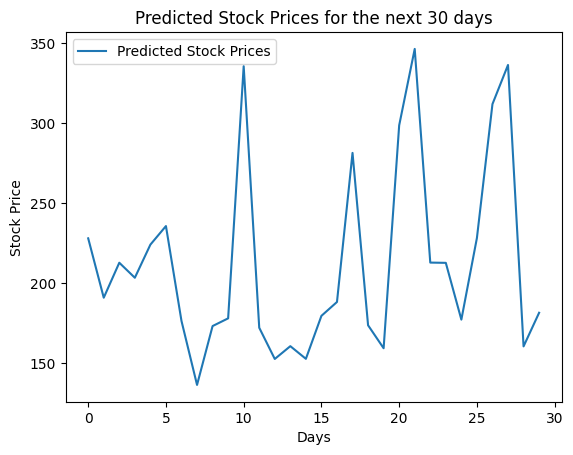

In [69]:
import matplotlib.dates as mdates

# Ensure the Date column is of datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Get the last row of X_test (features) to base the prediction on
last_known_data = X_test.iloc[-1].values.reshape(1, -1)  # Reshape for a single prediction

# Create input data for the next 30 days by repeating the last known data
future_X = np.tile(last_known_data, (5, 1))  # Create a 30-row matrix with the same data

# Generate future dates for the next 30 business days
future_dates = pd.date_range(start=df['Date'].max(), periods=6, freq='B')[1:]  # 30 business days from last date

# Assuming you already have a model and test data
import matplotlib.pyplot as plt

# Predict stock prices for the next 30 days
predicted_stock_prices = model.predict(X_test)  # Use appropriate test data
predicted_stock_prices = predicted_stock_prices[:30]
# Print predicted stock prices
print("Predicted Stock Prices for the next 30 days:")
print(predicted_stock_prices)

# Plot the predicted stock prices
plt.plot(predicted_stock_prices, label='Predicted Stock Prices')
plt.title('Predicted Stock Prices for the next 30 days')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()  # Make sure this line is present to display the plot
